In [ ]:
import pandas as pd
url = '/content/sample_data/mnist_train_small.csv'
url_test = '/content/sample_data/mnist_test.csv'

df = pd.read_csv(url, nrows=2000, header=None)
test_df = pd.read_csv(url_test, nrows=250, header=None)

df.head()
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(2000, 785)

In [ ]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

y_test = test_df.iloc[:, 0]
X_test = test_df.iloc[:, 1:]

In [ ]:
X.shape

(2000, 784)

In [ ]:
X.shape[1]**.5

28.0

(784,)


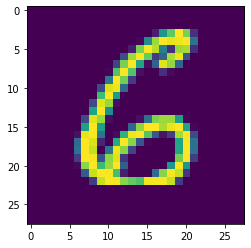

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

random_index = np.random.randint(0, X.shape[0])

random_row = X.iloc[random_index, :]

np_random_row = np.array(random_row)


print(np_random_row.shape)

random_im = np_random_row.reshape(28,28)

plt.imshow(random_im)
plt.show()

In [ ]:
y.value_counts()


1    222
9    217
7    216
2    215
8    197
6    197
4    193
3    186
5    180
0    177
Name: 0, dtype: int64

In [ ]:
# 1-hot
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

X_train = X
X_test = X_test

In [ ]:
#keras
from keras.models import Sequential
from keras.layers import Dense

num_cols = X.shape[1]

model = Sequential()

model.add(Dense(80, input_shape=(num_cols,), activation='relu'))

model.add(Dense(10, activation='softmax'))
print(model.summary())


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 80)                62800     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                810       
Total params: 63,610
Trainable params: 63,610
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50)
model.evaluate(X_test, y_test)

Epoch 1/50
63/63 [==============================] - 1s 3ms/step - loss: 63.6857 - accuracy: 0.3856
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 4.3480 - accuracy: 0.8009
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 2.1462 - accuracy: 0.8576
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 1.0071 - accuracy: 0.9026
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.9315
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2513 - accuracy: 0.9616
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9673
Epoch 8/50
63/63 [==============================] - 0s 3ms/step - loss: 0.1233 - accuracy: 0.9782
Epoch 9/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1236 - accuracy: 0.9840
Epoch 10/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.9872
Epoch 11/50
63/63 

[3.731977701187134, 0.9079999923706055]

In [ ]:
X.shape

(2000, 784)